In [3]:
import random
import numpy as np

traning_samples = {(random.randint(1, 100), random.randint(1, 100)): random.randint(1, 100) for _ in range(20)}
testing_samples = {(random.randint(1, 100), random.randint(1, 100)): random.randint(1, 100) for _ in range(20)}

training_set = [dict(list(traning_samples.items())[i: i+10]) for i in range(0, len(traning_samples.items()), 10)]

network_inputs = [np.array(list(batch.keys())) for batch in training_set]
network_truths = [np.array(list(batch.values())).reshape(10,1) for batch in training_set]

testing_inputs = np.array(list(testing_samples.keys()))
testing_truths = np.array(list(testing_samples.values())).reshape(20,1)

print(f'preshuffle network inputs: {network_inputs}')
print(f'presshuffle network truths: {network_truths}')

indices = random.shuffle(list(range(len(network_inputs))))
network_inputs = [network_inputs[i] for i in indices]
network_truths = [network_truths[i] for i in indices]

print(f'network inputs: {network_inputs}')
print(f'network truths: {network_truths}')

print(f'testinginputs: {testing_inputs}')
print(f'testing truths: {testing_truths}')

print(isinstance(testing_inputs, np.ndarray))  # Should print True
print(isinstance(testing_truths, np.ndarray))  # Should print True

preshuffle network inputs: [array([[56, 52],
       [87, 29],
       [16, 91],
       [11, 34],
       [74, 80],
       [54, 32],
       [40, 43],
       [15, 59],
       [64, 62],
       [33, 26]]), array([[19, 77],
       [68, 35],
       [30, 78],
       [ 7, 97],
       [41, 25],
       [41, 44],
       [13, 99],
       [37, 82],
       [30, 12],
       [30, 36]])]
presshuffle network truths: [array([[25],
       [25],
       [33],
       [43],
       [80],
       [21],
       [60],
       [ 8],
       [64],
       [18]]), array([[99],
       [86],
       [59],
       [31],
       [ 4],
       [86],
       [41],
       [15],
       [72],
       [29]])]


TypeError: 'NoneType' object is not iterable

# Regression Demo

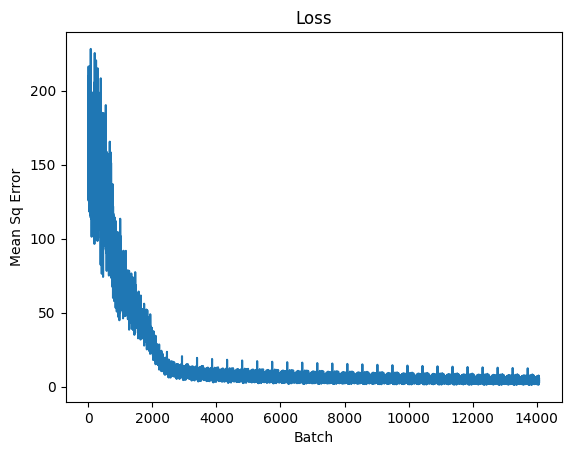

MSE: 5.287217128947485



,Model Predictions,Truths
0,-0.786134,-0.364801
1,14.589444,15.038301
2,-1.063384,-6.531986
3,8.948214,10.472391
4,2.921281,3.594579
5,3.318356,2.609538
6,4.977996,5.629605
7,13.091820,11.738875
8,-1.063384,-4.880679
9,19.810841,21.386248


In [9]:
import imports as im
import random
import numpy as np

training_samples = {}
def mapping(x,y,z):
    return 2*x + np.sin(y) + z**2
for i in range(30000):
    x = random.uniform(-5,5)
    y = random.uniform(-5,5)
    z = random.uniform(-5,5)
    w = mapping(x,y,z)
    training_samples[(x,y,z)] = w

testing_samples = {}
for i in range(10):
    x = random.uniform(-5,5)
    y = random.uniform(-5,5)
    z = random.uniform(-5,5)
    w = mapping(x,y,z)
    testing_samples[(x,y,z)] = w

network = im.Network([im.Layer(3, 4, 'sigmoid'),
                      im.Layer(4, 8, 'relu'),
                      im.Layer(8, 8, 'relu'),
                      im.Layer(8, 6, 'relu'),
                      im.Layer(6, 3, 'relu'),
                      im.Layer(3, 1, "linear")], 
                      rate=0.0001,
                      regressor=True)

network.train_test(
                training_samples=training_samples, 
                testing_samples=testing_samples, 
                batch_size=64,
                n_epochs=30
                )